# Sentiment Analysis for Customer Reviews Challenge

## Challenge:
Develop a robust Sentiment Analysis classifier for XYZ customer reviews, automating the categorization into positive, negative, or neutral sentiments. Utilize Natural Language Processing (NLP) techniques, exploring different sentiment analysis methods.

## Problem Statement:
XYZ organization, a global online retail giant, accumulates a vast number of customer reviews daily. Extracting sentiments from these reviews offers insights into customer satisfaction, product quality, and market trends. The challenge is to create an effective sentiment analysis model that accurately classifies XYZ customer reviews.

### Important Instructions:

1. Make sure this ipynb file that you have cloned is in the __Project__ folder on the Desktop. The Dataset is also available in the same folder.
2. Ensure that all the cells in the notebook can be executed without any errors.
3. Once the Challenge has been completed, save the SentimentAnalysis.ipynb notebook in the __*Project*__ Folder on the desktop. If the file is not present in that folder, autoevalution will fail.
4. Print the evaluation metrics of the model. 
5. Before you submit the challenge for evaluation, please make sure you have assigned the Accuracy score of the model that was created for evaluation.
6. Assign the Accuracy score obtained for the model created in this challenge to the specified variable in the predefined function *submit_accuracy_score*. The solution is to be written between the comments `# code starts here` and `# code ends here`
7. Please do not make any changes to the variable names and the function name *submit_accuracy_score* as this will be used for automated evaluation of the challenge. Any modification in these names will result in unexpected behaviour.

### --------------------------------------- CHALLENGE CODE STARTS HERE --------------------------------------------

In [7]:
import pandas as pd
import numpy as np
import nltk
import regex as re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import r2_score, roc_auc_score, classification_report, accuracy_score

In [2]:
df = pd.read_csv("Reviews.csv") #importing coding

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


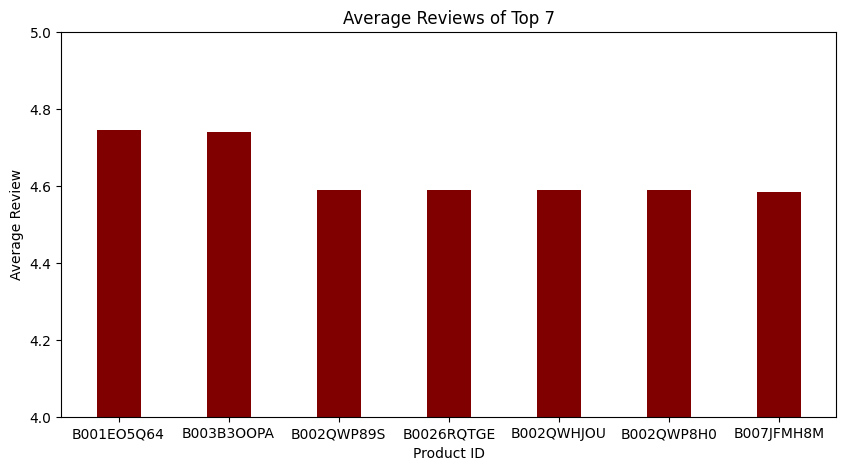

In [8]:
list1 = list(df['ProductId'].values)
dict1 = {}
for i in list1:
    dict1[i] = 0
for i in range(len(df)):
    dict1[df['ProductId'][i]] = dict1[df['ProductId'][i]]+1
# dict1
list2 = sorted(dict1.items(), key=lambda x:x[1], reverse = True)
dict2 = {}
for j in list2:
    i = list(j)
    if(i[1]>565):
        dict2[i[0]] = i[1]
    # print(i[1])
len(dict2)
dict3 = {}
for i in dict2:
    dict3[i] = 0
for i in range(len(df)):
    if df['ProductId'][i] in dict3.keys():
        dict3[df['ProductId'][i]] = dict3[df['ProductId'][i]]+int(df['Score'][i])

for i in dict3:
    dict3[i] = dict3[i]/dict2[i]

list3 = sorted(dict3.items(), key=lambda x:x[1], reverse = True)
dict4={}
for  i in list3:
    dict4[i[0]] = i[1]
courses = list(dict4.keys())
values = list(dict4.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)
plt.ylim(4,5)
plt.xlabel("Product ID")
plt.ylabel("Average Review")
plt.title("Average Reviews of Top 7")
plt.show()

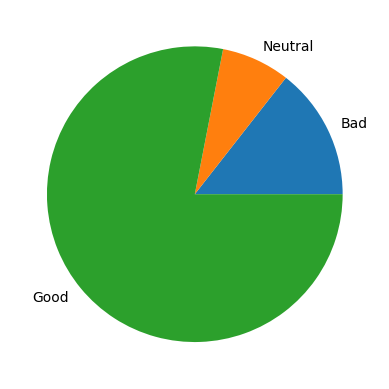

In [9]:
dict5 = {"Bad":0, "Neutral":0,"Good":0}
for i in range(len(df)):
    if(df['Score'][i]>3):
        dict5['Good'] = dict5['Good'] + 1
    elif df['Score'][i]==3:
        dict5['Neutral'] = dict5['Neutral'] +1
    else:
        dict5['Bad'] = dict5['Bad'] + 1

y = list(dict5.values())
x = list(dict5.keys())
plt.pie(y,labels = x)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [11]:
df.fillna('',inplace=True)

In [12]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/labuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stopwords = stopwords.words('english')

In [14]:
lemmatizer = WordNetLemmatizer()
def clean(text):
    text = text.lower()
    text = re.sub(r'[^a-z1-9]',' ',text)
    text = " ".join(lemmatizer.lemmatize(x) for x in text.split() if x not in stopwords)
    return text

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/labuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
ranges = []
ans=""
for i in df['Score']:
    if i>3:
        ans = "Posivitve"
    elif i<3:
        ans = "Negative"
    else:
        ans= "Neutral"
    
    ranges.append(ans)

In [17]:
len(ranges)

568454

In [18]:
df['cleaned_text_Text'] = df['Summary'].apply(lambda x : clean(x))

In [25]:
tfidf = TfidfVectorizer(analyzer='word',ngram_range=(1,3))
corpus =[]
for i in df['cleaned_text_Text'][:30000]:
    corpus.append(i)

ncorpus = tfidf.fit_transform(corpus)

In [26]:
final_corpus=[]
for i in df['cleaned_text_Text']:
    final_corpus.append(i)

final_ncorpus = tfidf.transform(final_corpus)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(ncorpus,ranges[:30000],random_state=42)

In [28]:
rfr = RandomForestRegressor()
sv = SVR()
rfc = RandomForestClassifier()
svc = SVC()

In [29]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.30      0.78      0.44       445
     Neutral       0.13      0.75      0.22       108
   Posivitve       0.99      0.82      0.90      6947

    accuracy                           0.81      7500
   macro avg       0.48      0.78      0.52      7500
weighted avg       0.94      0.81      0.86      7500



In [24]:
y_pred_final = svc.predict(final_ncorpus)
print(classification_report(y_pred_final,ranges))

              precision    recall  f1-score   support

    Negative       0.05      0.83      0.10      5349
     Neutral       0.03      0.49      0.06      2807
   Posivitve       1.00      0.79      0.88    560298

    accuracy                           0.79    568454
   macro avg       0.36      0.70      0.35    568454
weighted avg       0.98      0.79      0.87    568454



In [ ]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.48      0.54      0.51       353
     Neutral       0.20      0.49      0.29        86
   Posivitve       0.92      0.85      0.88      2061

    accuracy                           0.79      2500
   macro avg       0.53      0.62      0.56      2500
weighted avg       0.83      0.79      0.81      2500



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(ncorpus,df['Score'][:1000],random_state=42)

In [ ]:
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)

In [ ]:
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred_rfr))

0.12723425389467424
0.15499428519980407


### --------------------------------------- CHALLENGE CODE ENDS HERE --------------------------------------------

### NOTE:
1. Assign the Accuracy score obtained for the model created in this challenge to the specified variable in the predefined function *submit_accuracy_score* below. The solution is to be written between the comments `# code starts here` and `# code ends here`
2. Please do not make any changes to the variable names and the function name *submit_accuracy_score* as this will be used for automated evaluation of the challenge. Any modification in these names will result in unexpected behaviour.

In [ ]:
def submit_accuracy_score()-> float:
    #accuracy should be in the range of 0.0 to 1.0
    accuracy = 0.0
    # code starts here
    y_pred_final = svc.predict(final_ncorpus)
    accuracy = accuracy_score(y_pred_final,ranges)
    # code ends here
    return accuracy